In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/alzheimers_disease_data.csv')

# Remove columns that do not matter
df = df.drop(columns=["PatientID", "DoctorInCharge"])

# Features and target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8976744186046511
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       277
           1       0.87      0.84      0.85       153

    accuracy                           0.90       430
   macro avg       0.89      0.88      0.89       430
weighted avg       0.90      0.90      0.90       430



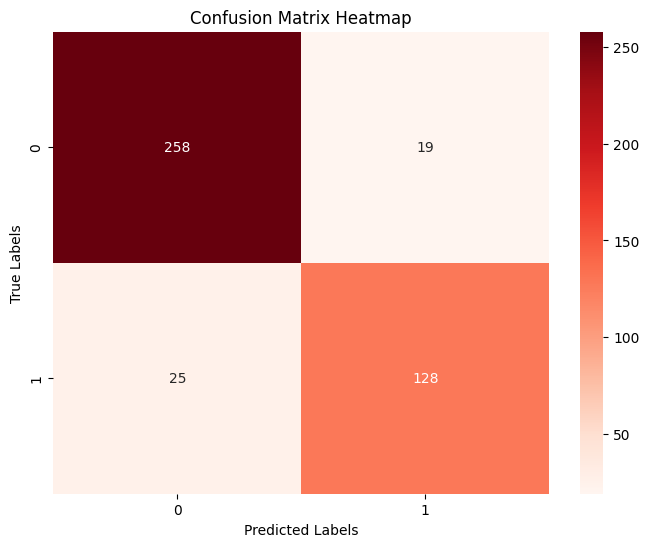

In [3]:

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

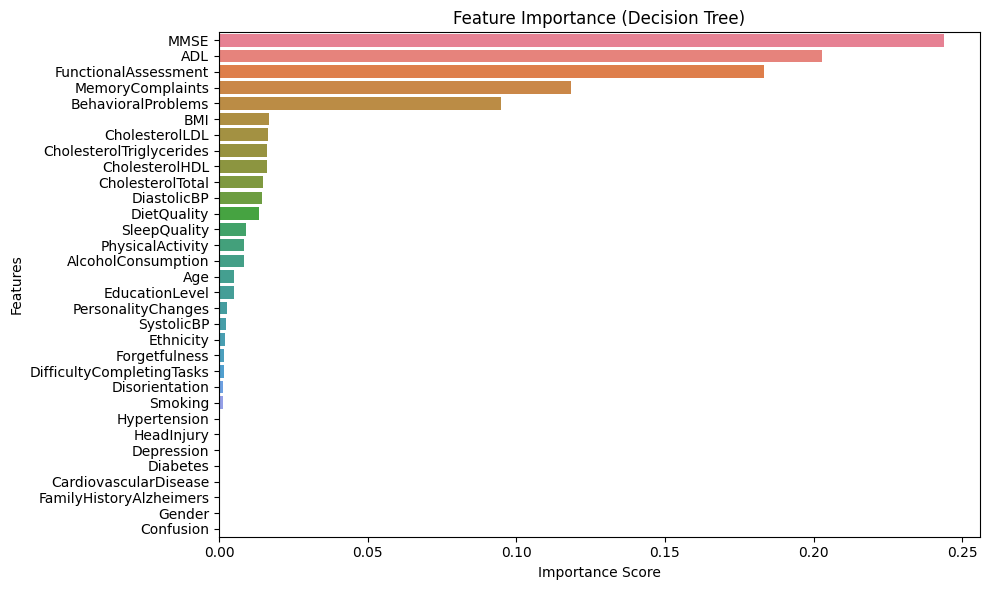

In [5]:
# Get feature names and their importance scores
feature_names = X.columns
importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x=importance_df['Importance'], 
    y=importance_df['Feature'], 
    hue=importance_df['Feature'],  # Assigning `y` to `hue`
    dodge=False,  # Disable dodge as we're not creating grouped bars
    legend=False  # Avoid showing a legend for feature names
)
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
